<p><font size="6"><b> CASE - Biodiversity data - analysis</b></font></p>


> *DS Data manipulation, analysis and visualisation in Python*  
> *December, 2016*

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')

## Reading in the enriched survey data set

<div class="alert alert-success">
    <b>EXERCISE</b>:

<ul>
  <li>Read in the 'survey_data_completed.csv' file and save the resulting DataFrame as variable `survey_data_processed` (if you did not complete the previous notebook, a version of the csv file is also available in the `../data` folder).</li>
  <li>Interpret the 'eventDate' column directly as python datetime object and make sure the 'occurrenceID' column is used as the index of the resulting DataFrame (both can be done at once when reading the csv file)</li>
  <li>Inspect the resulting frame (remember `.head()` and `.info()`) and check that the 'eventDate' indeed has a datetime data type.</li>
</ul> 
    
</div>

In [2]:
survey_data_processed = pd.read_csv("../data/survey_data_completed.csv", 
                                    parse_dates=['eventDate'], index_col="occurrenceID")

In [3]:
survey_data_processed.head()

,verbatimLocality,verbatimSex,wgt,datasetName,sex,eventDate,decimalLongitude,decimalLatitude,genus,species,taxa,name,class,kingdom,order,phylum,scientificName,status,usageKey
occurrenceID,,,,,,,,,,,,,,,,,,,
1,2,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,-109.081975,31.938887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,-109.081208,31.938896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,F,NaN,Ecological Archives E090-118-D1.,female,1977-07-16,-109.081975,31.938887,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
4,7,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,-109.082816,31.938113,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
5,3,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,-109.081208,31.938896,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0


In [4]:
survey_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35550 entries, 1 to 35550
Data columns (total 19 columns):
verbatimLocality    35550 non-null int64
verbatimSex         33042 non-null object
wgt                 32283 non-null float64
datasetName         35550 non-null object
sex                 33041 non-null object
eventDate           35550 non-null datetime64[ns]
decimalLongitude    35550 non-null float64
decimalLatitude     35550 non-null float64
genus               33535 non-null object
species             33535 non-null object
taxa                33535 non-null object
name                33535 non-null object
class               33441 non-null object
kingdom             33441 non-null object
order               33441 non-null object
phylum              33441 non-null object
scientificName      33441 non-null object
status              33441 non-null object
usageKey            33441 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(13)
memory usage: 5.4+ MB


## Tackle missing values (NaN) and duplicate values

<div class="alert alert-success">
    <b>EXERCISE</b>: How many records are in the data set without information on the 'species' name?
</div>

In [5]:
sum(survey_data_processed['species'].isnull())

2015

<div class="alert alert-success">
    <b>EXERCISE</b>: How many duplicate records are present in the dataset?
</div>

In [6]:
sum(survey_data_processed.duplicated())

1577

<div class="alert alert-success">
    <b>EXERCISE</b>: Extract a list of all duplicates (check documentation of `duplicated`!), sort on the columns `eventDate` and `verbatimLocality` and show the first 10 records
</div>

In [7]:
survey_data_processed[survey_data_processed.duplicated(keep=False)].sort_values(["eventDate", "verbatimLocality"]).head(10)

,verbatimLocality,verbatimSex,wgt,datasetName,sex,eventDate,decimalLongitude,decimalLatitude,genus,species,taxa,name,class,kingdom,order,phylum,scientificName,status,usageKey
occurrenceID,,,,,,,,,,,,,,,,,,,
5,3,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,-109.081208,31.938896,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
14,3,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,-109.081208,31.938896,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
4,7,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,-109.082816,31.938113,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
13,7,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,-109.082816,31.938113,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
34,11,F,NaN,Ecological Archives E090-118-D1.,female,1977-07-17,-109.079307,31.938056,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
38,11,F,NaN,Ecological Archives E090-118-D1.,female,1977-07-17,-109.079307,31.938056,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
40,11,F,NaN,Ecological Archives E090-118-D1.,female,1977-07-17,-109.079307,31.938056,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
27,15,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-17,-109.081036,31.937059,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
28,15,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-17,-109.081036,31.937059,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0


<div class="alert alert-success">
        <b>EXERCISE</b>: Exclude the duplicate values from the survey data set and save the result as `survey_data_unique`
</div>

In [8]:
survey_data_unique = survey_data_processed.drop_duplicates()

In [9]:
len(survey_data_unique)

33973

<div class="alert alert-success">
    <b>EXERCISE</b>: For how many records we have all the information available (i.e. no NaN values in any of the columns)?
</div>

In [10]:
len(survey_data_unique.dropna())

29777

<div class="alert alert-success">
    <b>EXERCISE</b>: Select the subset of records without a species name, while having information on the sex and store the result as variable `not_identified`
</div>

In [11]:
mask = survey_data_unique['species'].isnull() & survey_data_unique['sex'].notnull()
not_identified = survey_data_unique[mask]

In [12]:
not_identified.head()

,verbatimLocality,verbatimSex,wgt,datasetName,sex,eventDate,decimalLongitude,decimalLatitude,genus,species,taxa,name,class,kingdom,order,phylum,scientificName,status,usageKey
occurrenceID,,,,,,,,,,,,,,,,,,,
1,2,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,-109.081975,31.938887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,-109.081208,31.938896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,15,F,NaN,Ecological Archives E090-118-D1.,female,1977-07-17,-109.081036,31.937059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,17,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-17,-109.079415,31.937117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,2,M,NaN,Ecological Archives E090-118-D1.,male,1977-08-19,-109.081975,31.938887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-success">
    <b>EXERCISE</b>: Select only those records that do have species information and save them as the variable `survey_data`. Make sure `survey_data` is a copy of the original DataFrame. This is the DataFrame we will use in the further analyses.
</div>

In [13]:
survey_data = survey_data_unique.dropna(subset=['species']).copy()

<div class="alert alert-danger">
    <b>NOTE</b>: For biodiversity studies, absence values (knowing that someting is not present) are useful as well to normalize the observations, but this is out of scope for these exercises.
</div>

## Observations over time

<div class="alert alert-success">
    <b>EXERCISE</b>: Make a plot visualizing the evolution of the number of observations for each of the individual years.
</div>

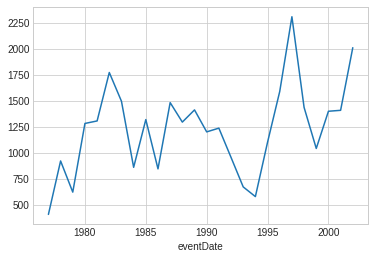

In [14]:
survey_data.set_index('eventDate').resample('A').size().plot()

To evaluate the intensity or number of occurrences during different time spans, a heatmap is an interesting representation. We can actually use the plotnine library as well to make heatmaps, as it provides the [`geom_tile`](http://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_tile.html) geometry. Loading the library:

In [15]:
import plotnine as pn

/home/stijn_vanhoey/.pyenv/versions/miniconda3-4.3.11/envs/DS-python-data-analysis/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<div class="alert alert-success">
    <b>EXERCISE</b>: Create a table, called `heatmap_prep_plotnine`, based on the `survey_data` DataFrame with a column for the years, a column for the months a column with the counts (called `count`).
</div>

In [16]:
heatmap_prep_plotnine = survey_data.groupby([survey_data['eventDate'].dt.year, 
                                             survey_data['eventDate'].dt.month]).size()
heatmap_prep_plotnine.index.names = ["year", "month"]
heatmap_prep_plotnine = heatmap_prep_plotnine.reset_index(name='count')

In [17]:
heatmap_prep_plotnine.head()

,year,month,count
0,1977,7,47
1,1977,8,74
2,1977,9,76
3,1977,10,88
4,1977,11,59


<div class="alert alert-success">
    <b>EXERCISE</b>: Based on `heatmap_prep_plotnine`, make a heatmap using the plotnine package. When in trouble, check [this](http://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_tile.html#Annotated-Heatmap) documentation:
</div>

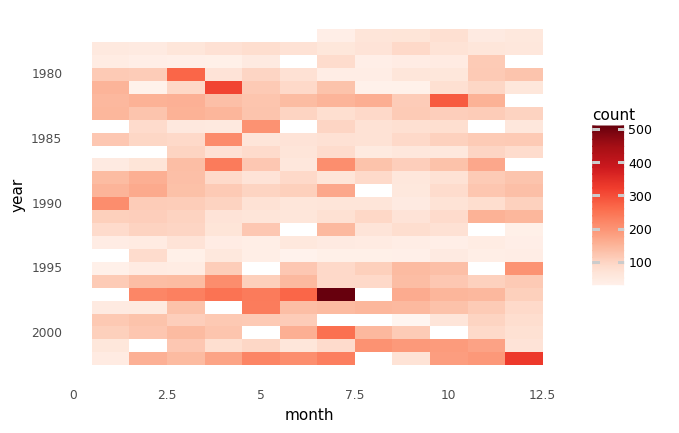

<ggplot: (8777920514694)>

In [18]:
(pn.ggplot(heatmap_prep_plotnine, pn.aes(x="month", y="year", fill="count"))
    + pn.geom_tile()
    + pn.scale_fill_cmap("Reds")
    + pn.scale_y_reverse()
    + pn.theme( 
     axis_ticks=pn.element_blank(),
     panel_background=pn.element_rect(fill='white'))
)  

Remark that we started from a `tidy` data format (also called *long* format). 

The heatmap functionality is also provided by the plotting library [seaborn](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (check the docs!). Based on the documentation, seaborn uses the *short* format with in the row index the years, in the column the months and the counts for each of these year/month combinations as values.

Let's reformat the `heatmap_prep_plotnine` data to be useable for the seaborn heatmap function:

<div class="alert alert-success">
    <b>EXERCISE</b>: Create a table, called `heatmap_prep_sns`, based on the `heatmap_prep_plotnine` DataFrame with in the row index the years, in the column the months and as values of the table, the counts for each of these year/month combinations.
</div>

In [19]:
heatmap_prep_sns = heatmap_prep_plotnine.pivot_table(index='year', columns='month', values='count')

<div class="alert alert-success">
    <b>EXERCISE</b>: Using the seaborn [documentation](http://seaborn.pydata.org/generated/seaborn.heatmap.html), make a heatmap starting from the `heatmap_prep_sns` variable.
</div>

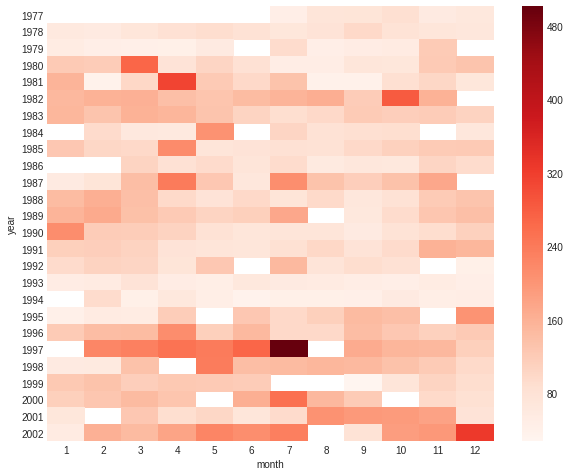

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(heatmap_prep_sns, cmap='Reds')

<div class="alert alert-success">
    <b>EXERCISE</b>: Based on the `heatmap_prep_sns` DataFrame, return to the *long* format of the table with the columns `year`, `month` and `count` and call the resulting variable `heatmap_tidy`.
</div>

In [21]:
heatmap_tidy = heatmap_prep_sns.reset_index().melt(id_vars=["year"], value_name="count")
heatmap_tidy.head()

,year,month,count
0,1977,1,NaN
1,1978,1,63.0
2,1979,1,55.0
3,1980,1,124.0
4,1981,1,157.0


## Species abundance for each of the plots

The name of the observed species consists of two parts: the 'genus' and 'species' columns. For the further analyses, we want the combined name. This is already available as the 'name' column if you completed the previous notebook, otherwise you can add this again in the following exercise.

<div class="alert alert-success">
    <b>EXERCISE</b>: Make a new column 'name' that combines the 'Genus' and 'species' columns (with a space in between).
</div>

In [22]:
survey_data['name'] = survey_data['genus'] + ' ' + survey_data['species']

<div class="alert alert-success">
    <b>EXERCISE</b>: Which 8 species have been observed most of all?
</div>

In [23]:
survey_data.groupby("name").size().nlargest(8)

name
Dipodomys merriami           10025
Dipodomys ordii               2966
Chaetodipus penicillatus      2928
Chaetodipus baileyi           2696
Reithrodontomys megalotis     2485
Dipodomys spectabilis         2481
Onychomys torridus            2220
Perognathus flavus            1475
dtype: int64

In [24]:
survey_data['name'].value_counts()[:8]

Dipodomys merriami           10025
Dipodomys ordii               2966
Chaetodipus penicillatus      2928
Chaetodipus baileyi           2696
Reithrodontomys megalotis     2485
Dipodomys spectabilis         2481
Onychomys torridus            2220
Perognathus flavus            1475
Name: name, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: How many records are available of each of the species in each of the plots (called `verbatimLocality`)? How would you visualize this information with seaborn?
</div>

In [25]:
species_per_plot = survey_data.reset_index().pivot_table(index="name", 
                                                         columns="verbatimLocality", 
                                                         values="occurrenceID", 
                                                         aggfunc='count')

# alternative ways to calculate this
#species_per_plot =  survey_data.groupby(['name', 'plot_id']).size().unstack(level=-1)
#species_per_plot = pd.crosstab(survey_data['name'], survey_data['plot_id'])

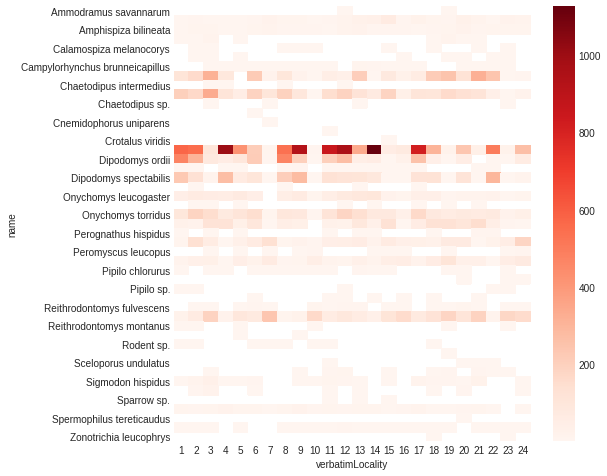

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(species_per_plot, ax=ax, cmap='Reds')

<div class="alert alert-success">
    <b>EXERCISE</b>: What is the number of different species in each of the plots? Make a bar chart, using Pandas `plot` function, providing for each plot the diversity of species, by defining a matplotlib figure and ax to make the plot. Change the y-label to 'plot number'
</div>

Text(0,0.5,'plot number')

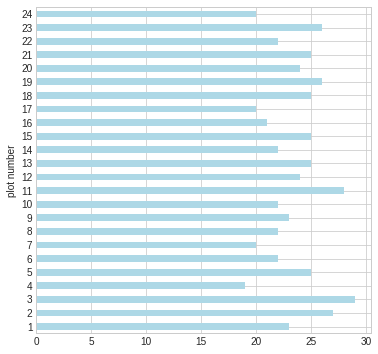

In [27]:
# inspired on the pivot table we already had:
species_per_plot = survey_data.reset_index().pivot_table(index="name", 
                                                         columns="verbatimLocality", 
                                                         values="occurrenceID", 
                                                         aggfunc='count')

fig, ax = plt.subplots(figsize=(6, 6))
species_per_plot.count().plot(kind="barh", ax=ax, color="lightblue")
ax.set_ylabel("plot number")

# Alternative option:
# survey_data.groupby(["plot_id"])["species"].nunique()

<div class="alert alert-success">
    <b>EXERCISE</b>: What is the number of plots each species have been observed? Make an horizontal bar chart using Pandas `plot` function providing for each species the spread amongst the plots for which the species names are sorted to the number of plots
</div>

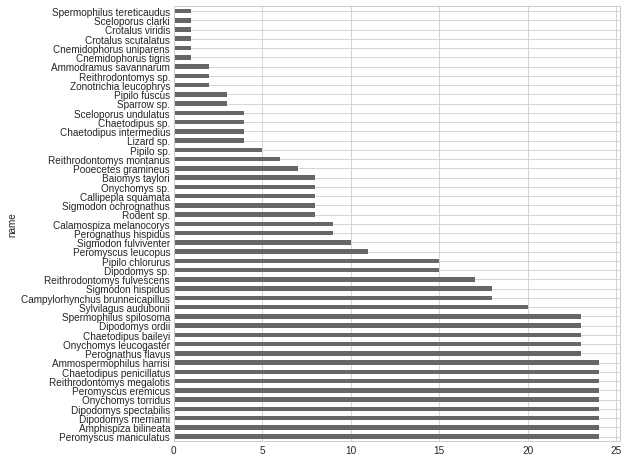

In [28]:
species_per_plot2 = survey_data.reset_index().pivot_table(index="verbatimLocality",
                                                          columns="name",
                                                          values="occurrenceID",
                                                          aggfunc='count')
nplots_per_species = species_per_plot2.count().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))
nplots_per_species.plot(kind="barh", ax=ax, color='0.4')

# Alternatives
#species_per_plot.count(axis=1).sort_values(ascending=False).plot(kind='bar')
#survey_data.groupby(["name"])["plot_id"].nunique().sort_values().plot(kind='bar')

<div class="alert alert-success">
    <b>EXERCISE</b>: Evaluate the amount of males and females present in each of the plots. Make sure to exclude NaN-values and save the result (with the verbatimLocality as index and sex as column names in a variable `n_plot_sex`
</div>

In [29]:
subselection_sex = survey_data.dropna(subset=["sex"])
#subselection_sex = survey_data[survey_data["sex"].notnull()]

In [30]:
n_plot_sex = subselection_sex.groupby(["sex", "verbatimLocality"]).size().unstack(level=0)
n_plot_sex.head()

sex,female,male
verbatimLocality,,
1,792,1027
2,838,1018
3,810,742
4,825,972
5,495,553


As such, we can use the variable `n_plot_sex` to plot the result:

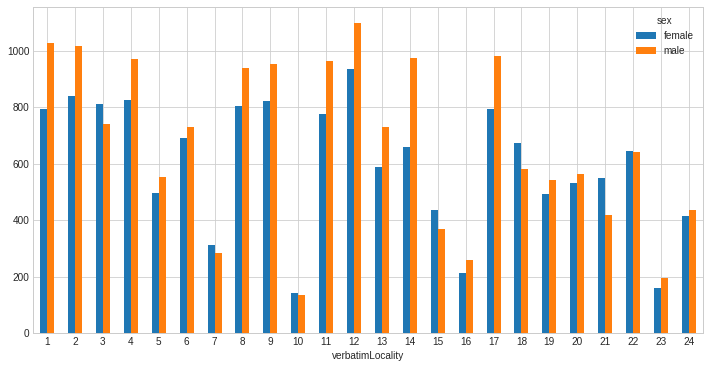

In [31]:
n_plot_sex.plot(kind='bar', figsize=(12, 6), rot=0)

<div class="alert alert-success">
    <b>EXERCISE</b>: Create the previous plot with the plotnine library, directly from the variable `subselection_sex`. When in trouble, check the [docs](http://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_col.html#Two-Variable-Bar-Plot)!
</div>

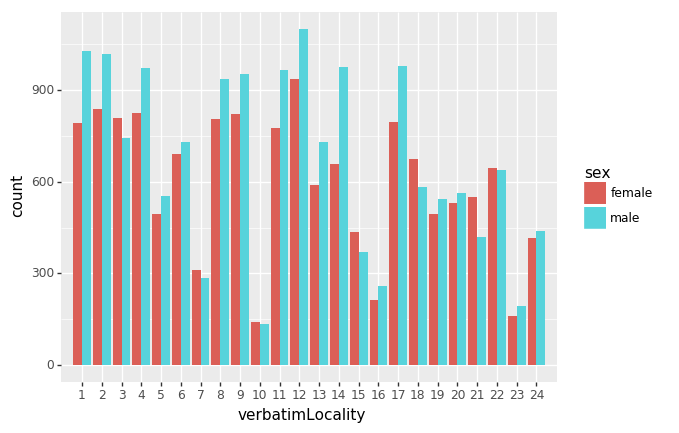

<ggplot: (8777920032057)>

In [32]:
(pn.ggplot(subselection_sex, pn.aes(x="verbatimLocality", fill="sex"))
     + pn.geom_bar(position='dodge')
     + pn.scale_x_discrete(breaks=np.arange(1, 25, 1), limits=np.arange(1, 25, 1))
)

## Select subsets according to taxa of species

In [33]:
survey_data["taxa"].unique()

array(['Rodent', 'Rodent-not censused', 'Rabbit', 'Bird', 'Reptile'], dtype=object)

In [34]:
survey_data['taxa'].value_counts()
#survey_data.groupby('taxa').size()

Rodent                 30939
Rodent-not censused      595
Bird                     354
Rabbit                    59
Reptile                   14
Name: taxa, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Select the records for which the `taxa` is equal to 'Rabbit', 'Bird' or 'Reptile'. Call the resulting variable `non_rodent_species`.
</div>

In [35]:
non_rodent_species = survey_data[survey_data['taxa'].isin(['Rabbit', 'Bird', 'Reptile'])]

In [36]:
len(non_rodent_species)

427

<div class="alert alert-success">
    <b>EXERCISE</b>: Select the records for which the `taxa` starts with an 'ro' (make sure it does not matter if a capital character is used in the 'taxa' name). Call the resulting variable `r_species`.
</div>

In [37]:
r_species = survey_data[survey_data['taxa'].str.lower().str.startswith('ro')]

In [38]:
len(r_species)

31534

<div class="alert alert-success">
    <b>EXERCISE</b>: Select the records that are not Birds. Call the resulting variable `non_bird_species`.
</div>

In [39]:
non_bird_species = survey_data[survey_data['taxa'] != 'Bird']

In [41]:
len(non_bird_species)

31607

## (OPTIONAL SECTION) Evolution of species during monitoring period

*In this section, all plots can be made with the embedded Pandas plot function, unless specificly asked*

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot using Pandas `plot` function the number of records for `Dipodomys merriami` on yearly basis during time
</div>

In [42]:
merriami = survey_data[survey_data["name"] == "Dipodomys merriami"]

Text(0,0.5,'number of occurrences')

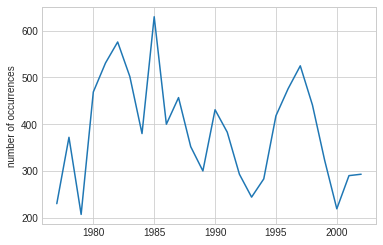

In [43]:
fig, ax = plt.subplots()
merriami.groupby(merriami['eventDate'].dt.year).size().plot(ax=ax)
ax.set_xlabel("")
ax.set_ylabel("number of occurrences")

<div class="alert alert-danger">
    <b>NOTE</b>: Check the difference between the following two graphs? What is different? Which one would you use?
</div>

In [ ]:
merriami = survey_data[survey_data["species"] == "merriami"]
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
merriami.groupby(merriami['eventDate']).size().plot(ax=ax[0], style="-") # top graph
merriami.set_index("eventDate").resample("D").size().plot(ax=ax[1], style="-") # lower graph

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot, for the species 'Dipodomys merriami', 'Dipodomys ordii', 'Reithrodontomys megalotis' and 'Chaetodipus baileyi', the monthly number of records as a function of time for the whole monitoring period. Plot each of the individual species in a separate subplot and provide them all with the same y-axis scale (cfr. documentation pandas plot function).
</div>

In [44]:
subsetspecies = survey_data[survey_data["name"].isin(['Dipodomys merriami', 'Dipodomys ordii',
                                                      'Reithrodontomys megalotis', 'Chaetodipus baileyi'])]

In [45]:
month_evolution = subsetspecies.set_index('eventDate').groupby("name").resample('M').size()

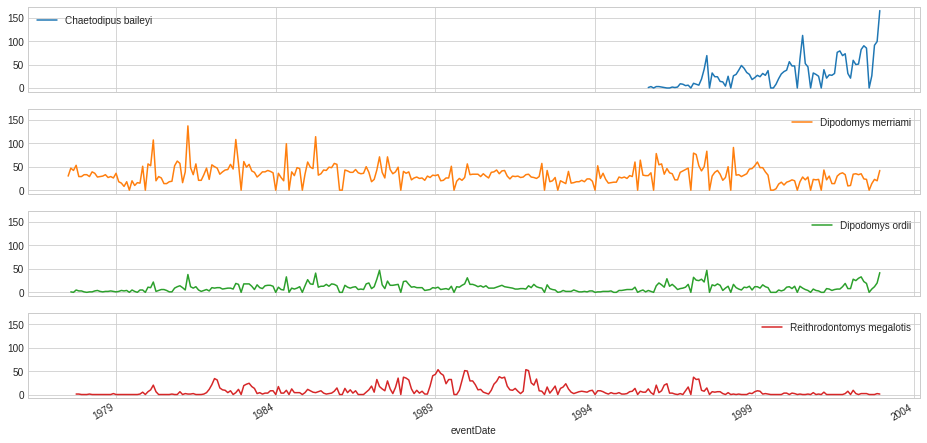

In [50]:
species_evolution = month_evolution.unstack(level=0)
axs = species_evolution.plot(subplots=True, figsize=(16, 8), sharey=True)

<div class="alert alert-success">
    <b>EXERCISE</b>: Reproduce the previous plot using the plotnine package.
</div>

In [68]:
subsetspecies = survey_data[survey_data["name"].isin(['Dipodomys merriami', 'Dipodomys ordii',
                                                      'Reithrodontomys megalotis', 'Chaetodipus baileyi'])]
month_evolution = subsetspecies.set_index('eventDate').groupby("name").resample('M').size()

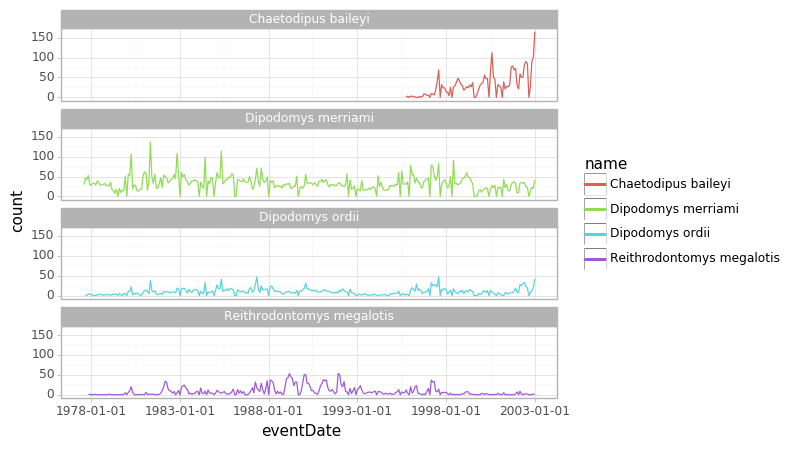

<ggplot: (-9223363258942326731)>

In [69]:
(pn.ggplot(month_evolution.reset_index(name='count'), pn.aes(x='eventDate', y='count', color='name'))
    + pn.geom_line()
    + pn.facet_wrap('name', nrow=4)
    + pn.theme_light()
)

<div class="alert alert-success">
    <b>EXERCISE</b>: Evaluate the yearly amount of occurrences for each of the 'taxa' as a function of time.
</div>

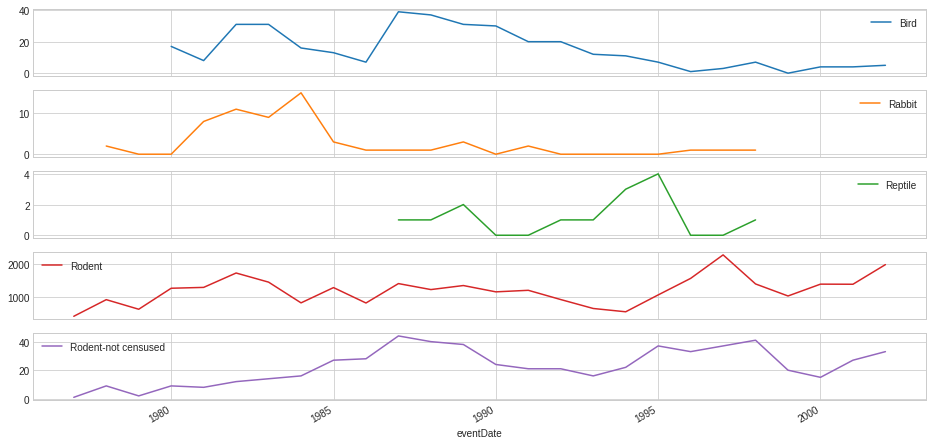

In [92]:
year_evolution = survey_data.set_index("eventDate").groupby("taxa").resample('A').size()
species_evolution = year_evolution.unstack(level=0)
axs = species_evolution.plot(subplots=True, figsize=(16, 8), sharey=False)

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the number of occurrences for each weekday, grouped by each year of the monitoring campaign, without using the `pivot` functionality. Call the variable `count_weekday_years`
</div>

In [93]:
count_weekday_years = survey_data.groupby([survey_data["eventDate"].dt.year, survey_data["eventDate"].dt.dayofweek]).size().unstack()

In [94]:
# Alternative
#years = survey_data["eventDate"].dt.year.rename('year')
#dayofweaks = survey_data["eventDate"].dt.dayofweek.rename('dayofweak')
#count_weekday_years = pd.crosstab(index=years, columns=dayofweaks)

In [95]:
count_weekday_years.head()

eventDate,0,1,2,3,4,5,6
eventDate,,,,,,,
1977,89.0,35.0,NaN,NaN,19.0,106.0,160.0
1978,121.0,14.0,16.0,71.0,148.0,277.0,275.0
1979,39.0,79.0,121.0,58.0,NaN,165.0,161.0
1980,234.0,162.0,94.0,62.0,81.0,160.0,489.0
1981,446.0,63.0,87.0,126.0,74.0,83.0,427.0


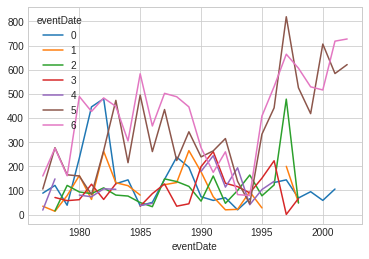

In [96]:
count_weekday_years.plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: Based on the variable `count_weekday_years`, calculate for each weekday the median amount of records based on the yearly count values. Modify the labels of the plot to indicate the actual days of the week (instead of numbers)
</div>

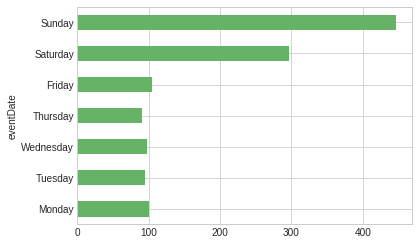

In [98]:
fig, ax = plt.subplots()
count_weekday_years.median(axis=0).plot(kind='barh', ax=ax, color='#66b266')
xticks = ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', "Thursday", "Friday", "Saturday", "Sunday"])